# Miniproject: Support Vector Machines

## Machine Learning, Winter 2017

### Name: Neel Shroff, Gherardo Morona, Kevin Sun, Jerry Yang

In this miniproject, you will:

* Tune an SVM to fit multiple "standard" datasets to explore kernels
* Classify image data with an SVM
* Preprocess that image data using a convolution.

In [1]:
# Standard import statements:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.datasets.samples_generator import make_blobs, make_moons, make_circles
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA

%matplotlib inline

plt.style.use("ggplot")

# The Scikit-learn `SVC` class and kernels

Here `SVC` stands for Support Vector Classifier and it has many features.  The most important thing to note to begin with is it takes a `kernel` keyword argument, and the default is the [Radial Basis Function](https://en.wikipedia.org/wiki/Radial_basis_function), because it's so successful.  But it's a bit aggressive for linearly or near-linearly separable data.  For that, you should use `kernel='linear'`.

### Linear Kernel

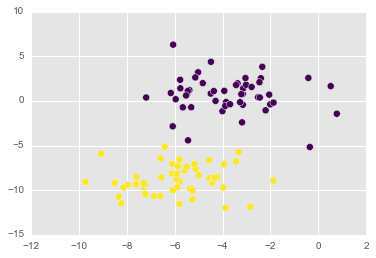

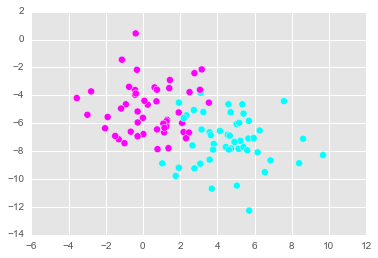

In [2]:
# Here are the datasets you're working` with, to start:
X_1, y_1 = make_blobs(centers=2, cluster_std=1.7, random_state=17)
X_2, y_2 = make_blobs(centers=2, cluster_std=1.7, random_state=12)
X_2[:,[0, 1]] = X_2[:,[1, 0]] ## swap columns to reflect in the line y=x
plt.scatter(X_1[:, 0], X_1[:, 1], c=y_1, s=50, cmap='viridis')
plt.show();
plt.scatter(X_2[:, 0], X_2[:, 1], c=y_2, s=50, cmap='cool')
plt.show();

The below method allows us to draw the decision boundaries for Support Vector Machines

In [3]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

First we have to create a SVC model and fit it to our first dataset. Since we want a linear decision boundary, we used kernel = 'linear' when constructing our model.

In [4]:
model = SVC(kernel='linear')
model.fit(X_1, y_1)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Let's plot the scatterplot and the decision function

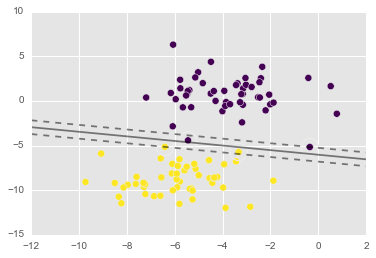

In [5]:
plt.scatter(X_1[:, 0], X_1[:, 1], c=y_1, s=50, cmap='viridis')
plot_svc_decision_function(model)
plt.show()

The two margin lines are pretty close together, and it seems like they fit the outliers a little too much. The graph suggests that the model uses the outliers as support vectors, but we don't want that. Let's decrease our C value to 0.05 so that the margins are wider and the effect of outliers decreases.

In [6]:
model = SVC(kernel='linear', C=0.05)
model.fit(X_1, y_1)

SVC(C=0.05, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

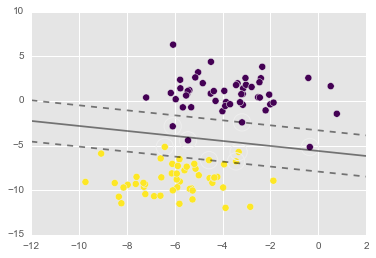

In [7]:
plt.scatter(X_1[:, 0], X_1[:, 1], c=y_1, s=50, cmap='viridis')
plot_svc_decision_function(model)
plt.show()

Much better! Now, the margins are closer to the non-outlier datapoints for each class, which is what we want. Let's do the same process for our second dataset.

In [8]:
model = SVC(kernel='linear')
model.fit(X_2, y_2)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

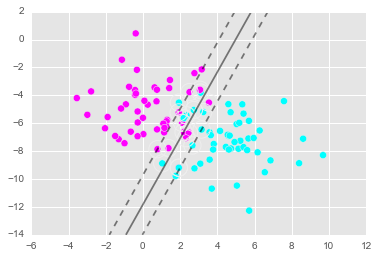

In [9]:
plt.scatter(X_2[:, 0], X_2[:, 1], c=y_2, s=50, cmap='cool')
plot_svc_decision_function(model)
plt.show()

Our model already looks pretty good in this case. But let's change C to see if we can find a more visually accurate model.

In [10]:
model = SVC(kernel='linear', C=100)
model.fit(X_2, y_2)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

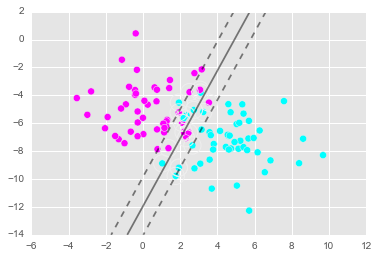

In [11]:
plt.scatter(X_2[:, 0], X_2[:, 1], c=y_2, s=50, cmap='cool')
plot_svc_decision_function(model)
plt.show()

These models are pretty similar, so it seems like increasing C doesn't have much effect in this case.

### Polynomial Kernel and RBF

For the polynomial kernel, you'll need to specify a degree number using `kernel='poly'` and `degree=3` (for degree-3).  Clearly, higher-degree polynomial kernels are more variant, and lower-degree polynomial kernels are more biased
.  For a `poly` kernel, you can also try adding a `coef0` term (and feel free to ask me what that means, or find out for yourself!).  For an RBF kernel, there's a hyperparameter that's either called $\gamma$ or $\epsilon$ (and one is $\dfrac{1}{2\pi \cdot\text{(the other one)}}$), that acts in a similar bias-variance way.

1. Fit a SVM with polynomial kernel of varying degrees to each of these datasets.
2. Fit a SVM with RBF kernel of varying amounts of $\gamma$.
3. Attempt to use your results to determine a relationship/function of *"Similar bias/variance"* relating `degree` in a polynomial kernel to `gamma` in an RBF kernel.  It won't be exact, it's just a rough comparison

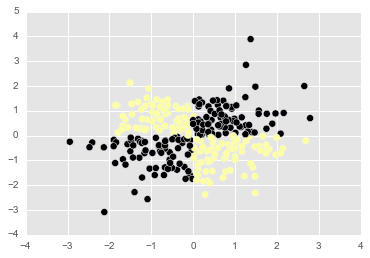

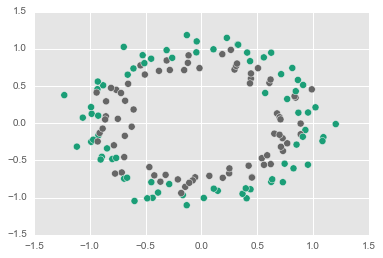

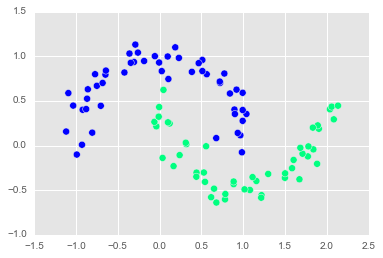

In [12]:
# Generate Datasets
X_3 = np.random.randn(300, 2)
y_3 = np.logical_xor(X_3[:, 0] > 0, X_3[:, 1] > 0).astype(int)
X_4, y_4 = make_circles(n_samples=150, shuffle=True, noise=0.1, random_state=11, factor=0.8)
X_4[:,[0, 1]] = X_4[:,[1, 0]]
X_5, y_5 = make_moons(n_samples=100, shuffle=True, noise=0.1, random_state=13)

# Plot them
plt.scatter(X_3[:, 0], X_3[:, 1], c=y_3, s=50, cmap='inferno')
plt.show();
plt.scatter(X_4[:, 0], X_4[:, 1], c=y_4, s=50, cmap='Dark2')
plt.show();
plt.scatter(X_5[:, 0], X_5[:, 1], c=y_5, s=50, cmap='winter')
plt.show();

For these datasets, we should follow the same process as we did above. However, in this case, we will try the polynomial and the rbf kernels. Let's begin with the polynomial kernel.

In [13]:
model = SVC(kernel='poly', degree=2)
model.fit(X_3, y_3)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

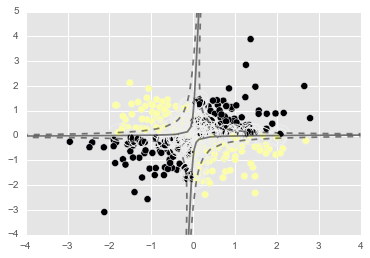

In [14]:
plt.scatter(X_3[:, 0], X_3[:, 1], c=y_3, s=50, cmap='inferno')
plot_svc_decision_function(model)
plt.show()

Let's change to make margins closer because there are few outliers and the model is using a lot of unnecessary support vectors. Making the margins smaller will reduce the number of support vectors. We can do this by increasing C.

In [15]:
model = SVC(kernel='poly', degree=2, C=100)
model.fit(X_3, y_3)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

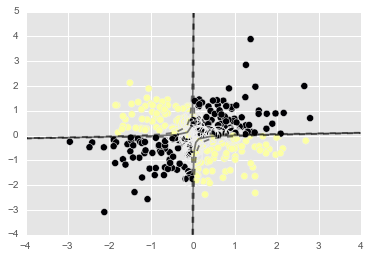

In [16]:
plt.scatter(X_3[:, 0], X_3[:, 1], c=y_3, s=50, cmap='inferno')
plot_svc_decision_function(model)
plt.show()

This looks much better.

Now let's use the RBF kernel on the same dataset.

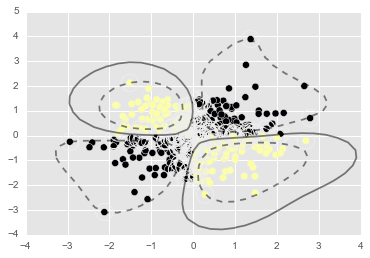

In [17]:
model = SVC(kernel='rbf')
model.fit(X_3, y_3)
plt.scatter(X_3[:, 0], X_3[:, 1], c=y_3, s=50, cmap='inferno')
plot_svc_decision_function(model)
plt.show()

This doesn't look very good. Let's fix this by changing gamma and C.

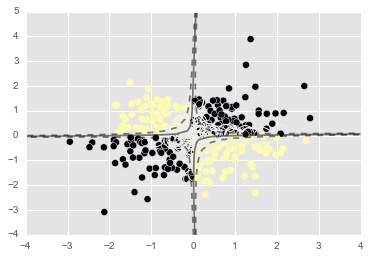

In [18]:
model = SVC(kernel='rbf', gamma=0.01, C=10000)
model.fit(X_3, y_3)
plt.scatter(X_3[:, 0], X_3[:, 1], c=y_3, s=50, cmap='inferno')
plot_svc_decision_function(model)
plt.show()

This looks much better!

Now let's move on to the next dataset. Let's begin by using the polynomial kernel and degree 2.

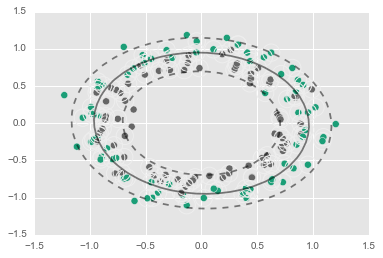

In [19]:
model = SVC(kernel='poly', degree=2, C=1)
model.fit(X_4, y_4)
plt.scatter(X_4[:, 0], X_4[:, 1], c=y_4, s=50, cmap='Dark2')
plot_svc_decision_function(model)
plt.show();

The degree looks good. However, the margins are too big. They should be closer to the decision boundary. There are currently too many support vectors. In order to fix this, let's increase C to 1000.

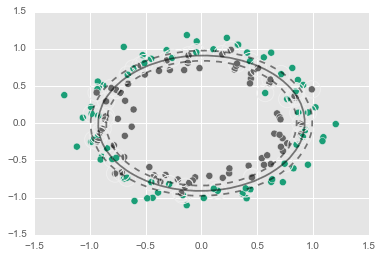

In [20]:
model = SVC(kernel='poly', degree=2, C=1000)
model.fit(X_4, y_4)
plt.scatter(X_4[:, 0], X_4[:, 1], c=y_4, s=50, cmap='Dark2')
plot_svc_decision_function(model)
plt.show();

A lot better! 

Now let's use the RBF kernel on the 4th dataset, using '0.05' as gamma and the same C.

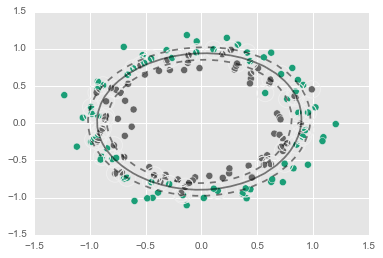

In [21]:
model = SVC(kernel='rbf', gamma=.05, C=1000)
model.fit(X_4, y_4)
plt.scatter(X_4[:, 0], X_4[:, 1], c=y_4, s=50, cmap='Dark2')
plot_svc_decision_function(model)
plt.show();

This also looks very good!

Let's move on to the final dataset! Let's begin with a polynomial kernel with degree 3, and C=10,

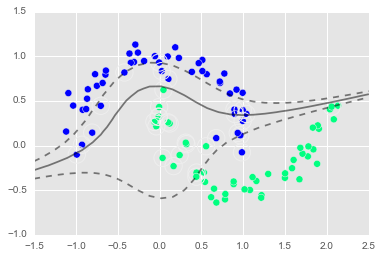

In [22]:
model = SVC(kernel='poly', degree=3, C=10)
model.fit(X_5, y_5)
plt.scatter(X_5[:, 0], X_5[:, 1], c=y_5, s=50, cmap='winter')
plot_svc_decision_function(model)
plt.show();

This looks pretty bad. Let's see if adding the coef0 term makes a difference.

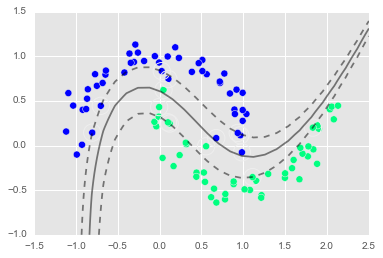

In [23]:
model = SVC(kernel='poly', degree=3, C=10, coef0=1)
model.fit(X_5, y_5)
plt.scatter(X_5[:, 0], X_5[:, 1], c=y_5, s=50, cmap='winter')
plot_svc_decision_function(model)
plt.show();

Wow, this looks much better!

Now let's try using the rbf kernel with gamma as 0.4 and C as 10.

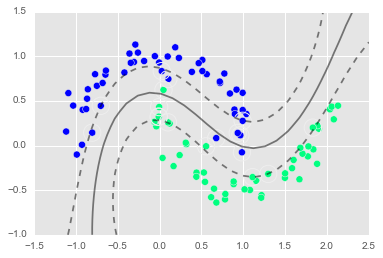

In [24]:
model = SVC(kernel='rbf', gamma=0.4, C=10)
model.fit(X_5, y_5)
plt.scatter(X_5[:, 0], X_5[:, 1], c=y_5, s=50, cmap='winter')
plot_svc_decision_function(model)
plt.show();

This also looks pretty good!

Let's compare the degrees and gammas we used in the three datasets to see if there is a relation.

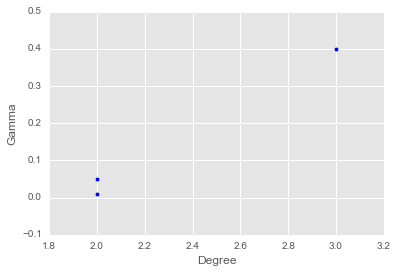

In [25]:
degrees = [2, 2, 3]
gamma = [0.01, 0.05, 0.4]

plt.scatter(degrees, gamma)
plt.xlabel("Degree")
plt.ylabel("Gamma")
plt.show()

Although there are not enough samples, it seems like a higher degree corresponds to a higher gamma in this case. In other words, similarly to degree, lower gammas correspond to higher bias while higher gammas correspond to higher variance.

# Image Classification

Now, we move on to image classification.  Let's begin with the `digits` dataset in Scikit-learn (A collection of handwritten digits which is a baby-version of the MNIST dataset):

Your tasks are as follows:
* Write a function `show(row)` to visualize the individual image at index `row` (just to make sure everything is working as intended).
* Train a SVM on the image dataset as it stands, tuning hyperparameters and aiming for the best fit.  (I say "as it stands" because in the [next section](#Convolutions-and-Preprocessing) you'll preprocess the images.)  
* Visualize your fit using PCA with the top two dimensions.  That is, fit a PCA to the dataset with two components, color the datapoints by their class.  You can attempt to plot a decision boundary by making a 64-dimensional meshgrid and pushing that through your model's `predict` and then the PCA transform (that would be cool if it worked), but you can also just change the plotting characters for your models correct-vs-incorrect classifications.  You may want to view notebook on PCA from before break for a refresher.
I recommend, but do not require, that you first subsample down to two classes (say, 1's and 0's) before moving on to the multi-class problem.

We'll begin by inputting the data.

In [26]:
data, data_y = load_digits(return_X_y = True)


Below is our method to visualize an image at a specific index.

In [27]:
def show(row):
    plt.imshow(data[row].reshape(8,8))


Below are two examples of the usage of the show method.

1


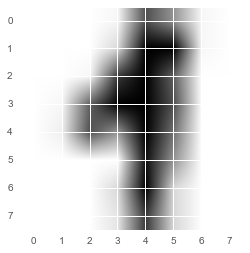

In [28]:
show(90)
print(data_y[90])

8


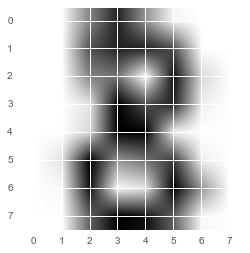

In [29]:
show(8)
print(data_y[8])

Looks like it works!

## Training a model on the raw data

We will create a train and test lists. We don't have to shuffle the original dataset becauseit is already randomly ordered. This will guarantee that we are having all 10 classes in both our train and test arrays.

In [30]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(data, data_y, train_size=0.65, test_size=0.35)

Now that we have the arrays, we can proceed with adjusting the hyperparameters to find the best model.

### Using and RBF kernel

In this case, after trial and error, we found the best gamma to be 0.001 and C to be 100.

In [31]:
model = SVC(kernel='rbf', gamma=0.001, C=100)
model.fit(train_X, train_y)
y_pred = model.predict(test_X)

In [32]:
accuracy_score(test_y, y_pred)

0.97774244833068358

The model is very accurate because the accuracy score is almost 100 percent.

### Using a Linear kernel

In this case, we found that C didn't really matter.

We could use C=0.001

In [33]:
model = SVC(kernel='linear', C=0.0001)
model.fit(train_X, train_y)
y_pred = model.predict(test_X)

In [34]:
accuracy_score(test_y, y_pred)

0.93958664546899839

But we could also use C=1000 and get about the same accuracy score (the difference is about 2 percent).

In [35]:
model = SVC(kernel='linear', C=1000)
model.fit(train_X, train_y)
y_pred = model.predict(test_X)

In [36]:
accuracy_score(test_y, y_pred)

0.9634340222575517

## Visualizing with PCA

Now we will try to visualize how well our model fit the test data.
We reduce the dimensionalities from 64 to 2 and color-code the scatterplot according to the y-predicted we found in the latest fitting we did, which we obtained with the linear kernel.

In [37]:
pca = PCA(n_components=2)
projected_test = pca.fit_transform(train_X)
projected = pca.transform(test_X)

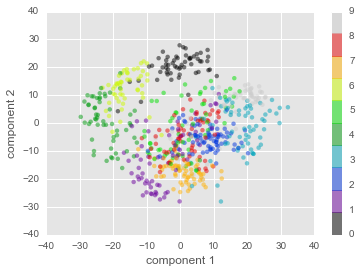

In [38]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=test_y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

This is the graph of the test_X vs. test_y. Above we can see the dataset reduced to two dimensions and colorcoded according to each class.


Now we are going to plot the misclassifications by creating an error_list.

In [39]:
error_list = [1 if y_pred[i] == test_y[i] else 0 for i in range(len(test_y))]

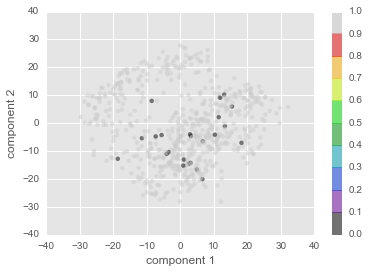

In [40]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=error_list, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

It looks like there aren't too many misclassifications!

# Convolutions and Preprocessing

This image data is pretty high-dimensional.  There are two preprocessing techniques I'd like for you to try:

1. PCA -- Fit a PCA to your data, and try to reduce the dimensionality of your data by some (probably small-ish?) factor.  Create a plot of "Dimensions Remaining" versus "Best fit model at 
2. Try to preprocess your data using a **convolution**.  This is the mathematical term for what photoshoppers call a *filter*.  What you need to do is this: write a method `convolve(data, matrix)` that takes a matrix of data points (really a row of your dataset) and a $3\times 3$ matrix and returns a new matrix (really a row of your new dataset) of data whereby the $(i,j)^{\text{th}}$ entry is the sum of the products of the elements surrounding $(i,j)^{\text{th}}$ entry in the entry data matrix.  Here's a picture:

 <img src="http://colah.github.io/posts/2014-07-Understanding-Convolutions/img/RiverTrain-ImageConvDiagram.png">

 And here's an example gif:

 <img src="http://deeplearning.net/software/theano/_images/numerical_no_padding_no_strides.gif">

 Here the "data matrix/row" is the big $5\times 5$ matrix on the left, the output matrix is the $3\times 3$ matrix on the right, and the convolution matrix (what they confusingly call the "kernel" above) is:

 $$\left(\begin{array}{ccc} 0 & 1 & 2 \\ 2 & 2 & 0 \\ 0 & 1 & 2 \end{array}\right)$$

 Here's a [blog post](http://colah.github.io/posts/2014-07-Understanding-Convolutions/) that goes into more detail than y'all need, but look through the pictures in the "Higher Dimensional Convolutions" section.  
 
 Okay, but what matrix should you use as your convolution matrix?  Ones that help to *detect edges* are
 
 $$\left(\begin{array}{ccc} 0 & -\frac{1}{4} & 0 \\ -\frac{1}{4} & 1 & -\frac{1}{4} \\ 0 & -\frac{1}{4} & 0 \end{array}\right)\qquad \text{and} \qquad \left(\begin{array}{ccc} -\frac{1}{9} & -\frac{1}{9} & -\frac{1}{9} \\ -\frac{1}{9} & 1 & -\frac{1}{9} \\ -\frac{1}{9} & -\frac{1}{9} & -\frac{1}{9} \end{array}\right).$$

 try both of these out.  Which works better? 
3. Put these two together: after completing both of the above, try fitting a PCA to your convolved data (note: the word used typically is *convolved*, not *convoluted*, though many people [myself included] accidentally say the latter at times)



We are going to fit a PCA to our data for each number of components from 2 to 62. Then we will graph the results. We are going to use 0.001 as gamma and 100 as C.

In [41]:
scores = []
for i in range(2, 64):
    pca = PCA(n_components=i)
    projected = pca.fit_transform(train_X)
    test_data = pca.transform(test_X)
    model = SVC(kernel="rbf", gamma=0.001, C=100)
    model.fit(projected, train_y)
    y_pred = model.predict(test_data)
    scores.append(accuracy_score(test_y, y_pred))

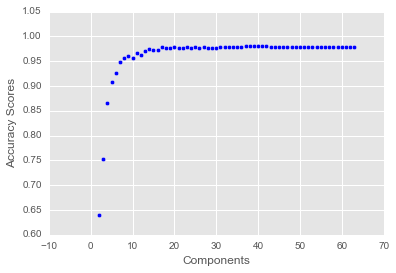

In [42]:
plt.scatter(range(2,64), scores)
plt.xlabel('Components')
plt.ylabel('Accuracy Scores')
plt.show()

It looks like the accuracy score reaches 90% at n=4 or n=5. Eventually, after n=15, the accuracy score remains almost constant.

Now let's create a `convolve` method and test it out on both of the datasets.

In [43]:
matrix1 = np.array([[0, -1/4, 0], [-1/4, 1, -1/4], [0, -1/4, 0]])
matrix2 = np.array([[-1/9, -1/9, -1/9], [-1/9, 1, -1/9], [-1/9, -1/9, -1/9]])


def convolve(data, matrix):
    l = data.shape[0]
    data2 = np.zeros([l-2, l-2])
    
    for i in range(1, l - 1):
        for j in range(1, l - 1):
            tmp = data[i-1:i+2,j-1:j+2]
            data2[i - 1][j - 1] = sum_product(tmp, matrix)
    return data2

# Find sum of products of 3x3 matrix a and b
def sum_product(a, b):
    sum = 0
    for i in range(3):
        for j in range(3):
            sum += a[i][j] * b[i][j]
    return sum

Now I will apply the convolution method on each of the datapoints. Then I will split it into training and test datasets. Let's use matrix1.

In [44]:
convolved_data = []
for i in range(len(data)):
    convolved_data.append(convolve(data[i].reshape(8, 8), matrix1).reshape(36))

convolved_data=np.array(convolved_data)
X_tr, X_te, y_tr, y_te = train_test_split(convolved_data, data_y, train_size=0.65, test_size=0.35)

Now let's use SVC to fit the data.

In [45]:
model = SVC(kernel="rbf", gamma=0.001, C=100)
model.fit(X_tr, y_tr)
y_pred = model.predict(X_te)
accuracy_score(y_te, y_pred)

0.97138314785373614

Wow, this is pretty accurate. Almost 100!

Let's also try matrix2.

In [46]:
convolved_data = []
for i in range(len(data)):
    convolved_data.append(convolve(data[i].reshape(8, 8), matrix2).reshape(36))

convolved_data=np.array(convolved_data)
X_tr, X_te, y_tr, y_te = train_test_split(convolved_data, data_y, train_size=0.65, test_size=0.35)

In [47]:
model = SVC(kernel="rbf", gamma=0.001, C=100)
model.fit(X_tr, y_tr)
y_pred = model.predict(X_te)
accuracy_score(y_te, y_pred)

0.96820349761526237

This one also has about the same accuracy.

Now let's try PCA on the convolved datasets to see if it works well. Let's use n_components=10.

In [48]:
pca = PCA(n_components=10)
convolved_data_1 = pca.fit_transform(X_tr)
d = pca.transform(X_te)

model = SVC(kernel="rbf", gamma=0.001, C=100)
model.fit(convolved_data_1, y_tr)
y_pred = model.predict(d)

accuracy_score(y_te, y_pred)

0.91414944356120831

In this case, the accuracy score is about 92%, which means it is slightly less accurate than the previous two models.

# "Real" Images

The following collection of datasets are of full-color, "real" images.  I don't want you to spend a ton of time trying to make a perfect classifier for these -- just pick one, potentially do some downsampling (take only a fraction of the dataset, because we're just learning how to do this, not doing this for a job), preprocessing (as before), and make sure that you can visualize the images and your classifier (again, use PCA).

* [Cats vs. Dogs](https://www.kaggle.com/c/dogs-vs-cats/data) -- 25,000 images of cats and dogs (binary classification).  It's a big download, and you almost certainly don't need the full dataset to get some progress with classifying them.  Virtual bonus points for making Dr. Z say "Awwww!" while grading your notebook.
* The real [MNIST](http://yann.lecun.com/exdb/mnist/) dataset -- the one we were working on above is a simpler one to classify (I think?), the real dataset has for more samples and is higher dimensional (higher resolution). You may find [this resource](http://scikit-learn.org/stable/datasets/#downloading-datasets-from-the-mldata-org-repository) useful.
* The [Caltech101](http://www.vision.caltech.edu/Image_Datasets/Caltech101/) -- images in 101 categories (feel free to group objects into larger categories, or downsample to only a few categories).
* Any other image dataset that you can find!  Do you want to create a classifier to tell jeeps from pickups? Stars from galaxies?  Go for it!  Just remember to also study for your test.

We are going to work with the MNIST dataset. First lets fetch the data.

In [49]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

Now let's check the size of the dataset

In [50]:
mnist.data.shape

(70000, 784)

70000 is a lot of samples. We will need to take a smaller sample size.

Since the dataset is not randomized, we will need to manually shuffle the dataset.

In [51]:
from random import shuffle
data_shuf = []
target_shuf = []
index_shuf = list(range(mnist.data.shape[0]))
shuffle(index_shuf)
for i in index_shuf:
    data_shuf.append(mnist.data[i])
    target_shuf.append(mnist.target[i])

Let's take about 1000 samples.

In [52]:
X = data_shuf[0:1000]
y = target_shuf[0:1000]

Now let's create the test and training datasets.

In [53]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.65, test_size=0.35)

Let's reduce the dimensions of the data by using PCA. We will begin with only keeping 2 components. Then we will fit this data using Support Vector Machines with a gamma of 0.000001 and a C of 100.

In [54]:
pca = PCA(n_components=2)
transformed_train_x = pca.fit_transform(train_X)
transformed_test_x = pca.transform(test_X)

model = SVC(kernel="rbf", gamma=0.000001, C=100)
model.fit(transformed_train_x, train_y)
y_pred = model.predict(transformed_test_x)

accuracy_score(test_y, y_pred)

0.47428571428571431

Since these images of digits have more dimensions (higher resolutions) than the previous images of digits (in the previous section), we are removing a lot more components by setting n_component to 2. This is why it makes sense that the accuracy score is only about 40%.

Let's change n_component to 9 and see if it makes a difference to the accuracy score.

In [55]:
pca = PCA(n_components=9)
transformed_train_x = pca.fit_transform(train_X)
transformed_test_x = pca.transform(test_X)

model = SVC(kernel="rbf", gamma=0.000001, C=100)
model.fit(transformed_train_x, train_y)
y_pred = model.predict(transformed_test_x)

accuracy_score(test_y, y_pred)

0.86285714285714288

Wow, changing n_component to 9 almost increased the accuracy score by 40%.

Now I am going to process the data by applying a convolution.
I am going to use the first matrix, `[[0, -1/4, 0], [-1/4, 1, -1/4], [0, -1/4, 0]]`.

The following loop might take a while to run because it needs to reshape each of the samples

In [56]:
convolved_data_update = []
for i in range(len(X)):
    convolved_data_update.append(convolve(X[i].reshape(28, 28), matrix1).reshape(676))

convolved_data_update=np.array(convolved_data_update)

Now let's create the test and training datasets. Note that this time I am using `convolved_data_update`.

In [57]:
train_X, test_X, train_y, test_y = train_test_split(convolved_data_update, y, train_size=0.65, test_size=0.35)

I am going to fit this data with an rbf kernel and a gamma of 0.000003

In [58]:
model = SVC(kernel="rbf", gamma=0.000003, C=10)
model.fit(train_X, train_y)
y_pred = model.predict(test_X)
accuracy_score(test_y, y_pred)

0.68857142857142861

This is slightly less accurate than the PCA model with 9 components, however this is more accurate than the PCA model with 2 components.

Now let's use PCA and the convolutions both to preprocess the data.

We will keep 5 components. Then we will fit this data using Support Vector Machines with a gamma of 0.000001 and a C of 100.

In [59]:
pca = PCA(n_components=5)
transformed_train_x = pca.fit_transform(train_X)
transformed_test_x = pca.transform(test_X)

model = SVC(kernel="rbf", gamma=0.000001, C=100)
model.fit(transformed_train_x, train_y)
y_pred = model.predict(transformed_test_x)

accuracy_score(test_y, y_pred)

0.38571428571428573

Seems like this isn't very accurate. In this case, it seems that either using PCA or convolution individually is a better idea.

Let's visualize the data using the first two components (through PCA).

I am going to graph a scatterplot of the test_X vs test_y plot. Then I am going to graph another plot that shows the misclassifications by y_pred.

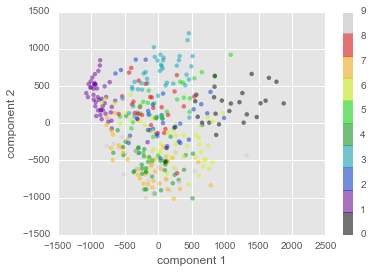

In [60]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.65, test_size=0.35)
pca = PCA(n_components=2)
transformed_train_x = pca.fit_transform(train_X)
transformed_test_x = pca.transform(test_X)

model = SVC(kernel="rbf", gamma=0.000001, C=100)
model.fit(transformed_train_x, train_y)
y_pred = model.predict(transformed_test_x)

plt.scatter(transformed_test_x[:, 0], transformed_test_x[:, 1],
            c=test_y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [61]:
error_list = [1 if y_pred[i] == test_y[i] else 0 for i in range(len(test_y))]

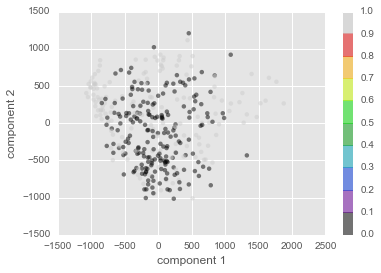

In [62]:
plt.scatter(transformed_test_x[:, 0], transformed_test_x[:, 1],
            c=error_list, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

As we had mentioned earlier, since these are very high-dimensional images, using only two components gets rid of a lot of important information. This is why there are a lot of misclassification errors.